In [1]:
#pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [1]:
#run on google colab access GPU resource
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  # or yolov8s.pt
model.train(data='name_tag.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.146 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.10  Python-3.9.13 torch-2.1.2+cpu CPU (AMD Ryzen 7 5700U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=name_tag.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning C:\Users\enoch\Image Processing\Staff Name Tag Detection - Copy\dataset\labels\train... 938 images, 773 backgrounds, 0 corrupt: 100%|██████████| 938/938 [00:00<00:00, 1114.02it/s]


train: New cache created: C:\Users\enoch\Image Processing\Staff Name Tag Detection - Copy\dataset\labels\train.cache


val: Scanning C:\Users\enoch\Image Processing\Staff Name Tag Detection - Copy\dataset\labels\val... 268 images, 220 backgrounds, 0 corrupt: 100%|██████████| 268/268 [00:00<00:00, 1140.42it/s]

val: New cache created: C:\Users\enoch\Image Processing\Staff Name Tag Detection - Copy\dataset\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
'GrouperView' object has no attribute 'join'
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.115      100.2     0.3719          5        640:  53%|█████▎    | 31/59 [03:02<02:44,  5.89s/it]


KeyboardInterrupt: 

In [3]:
model = YOLO("runs/detect/train3/weights/best.pt")
metrics = model.val()  # Re-evaluate on the validation set


Ultralytics YOLOv8.2.10  Python-3.9.13 torch-2.1.2+cpu CPU (AMD Ryzen 7 5700U with Radeon Graphics)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\enoch\Image Processing\Staff Name Tag Detection\dataset\labels\val.cache... 11 images, 8 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


                   all         11          3      0.473      0.333      0.335      0.101
Speed: 1.9ms preprocess, 66.9ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs\detect\val


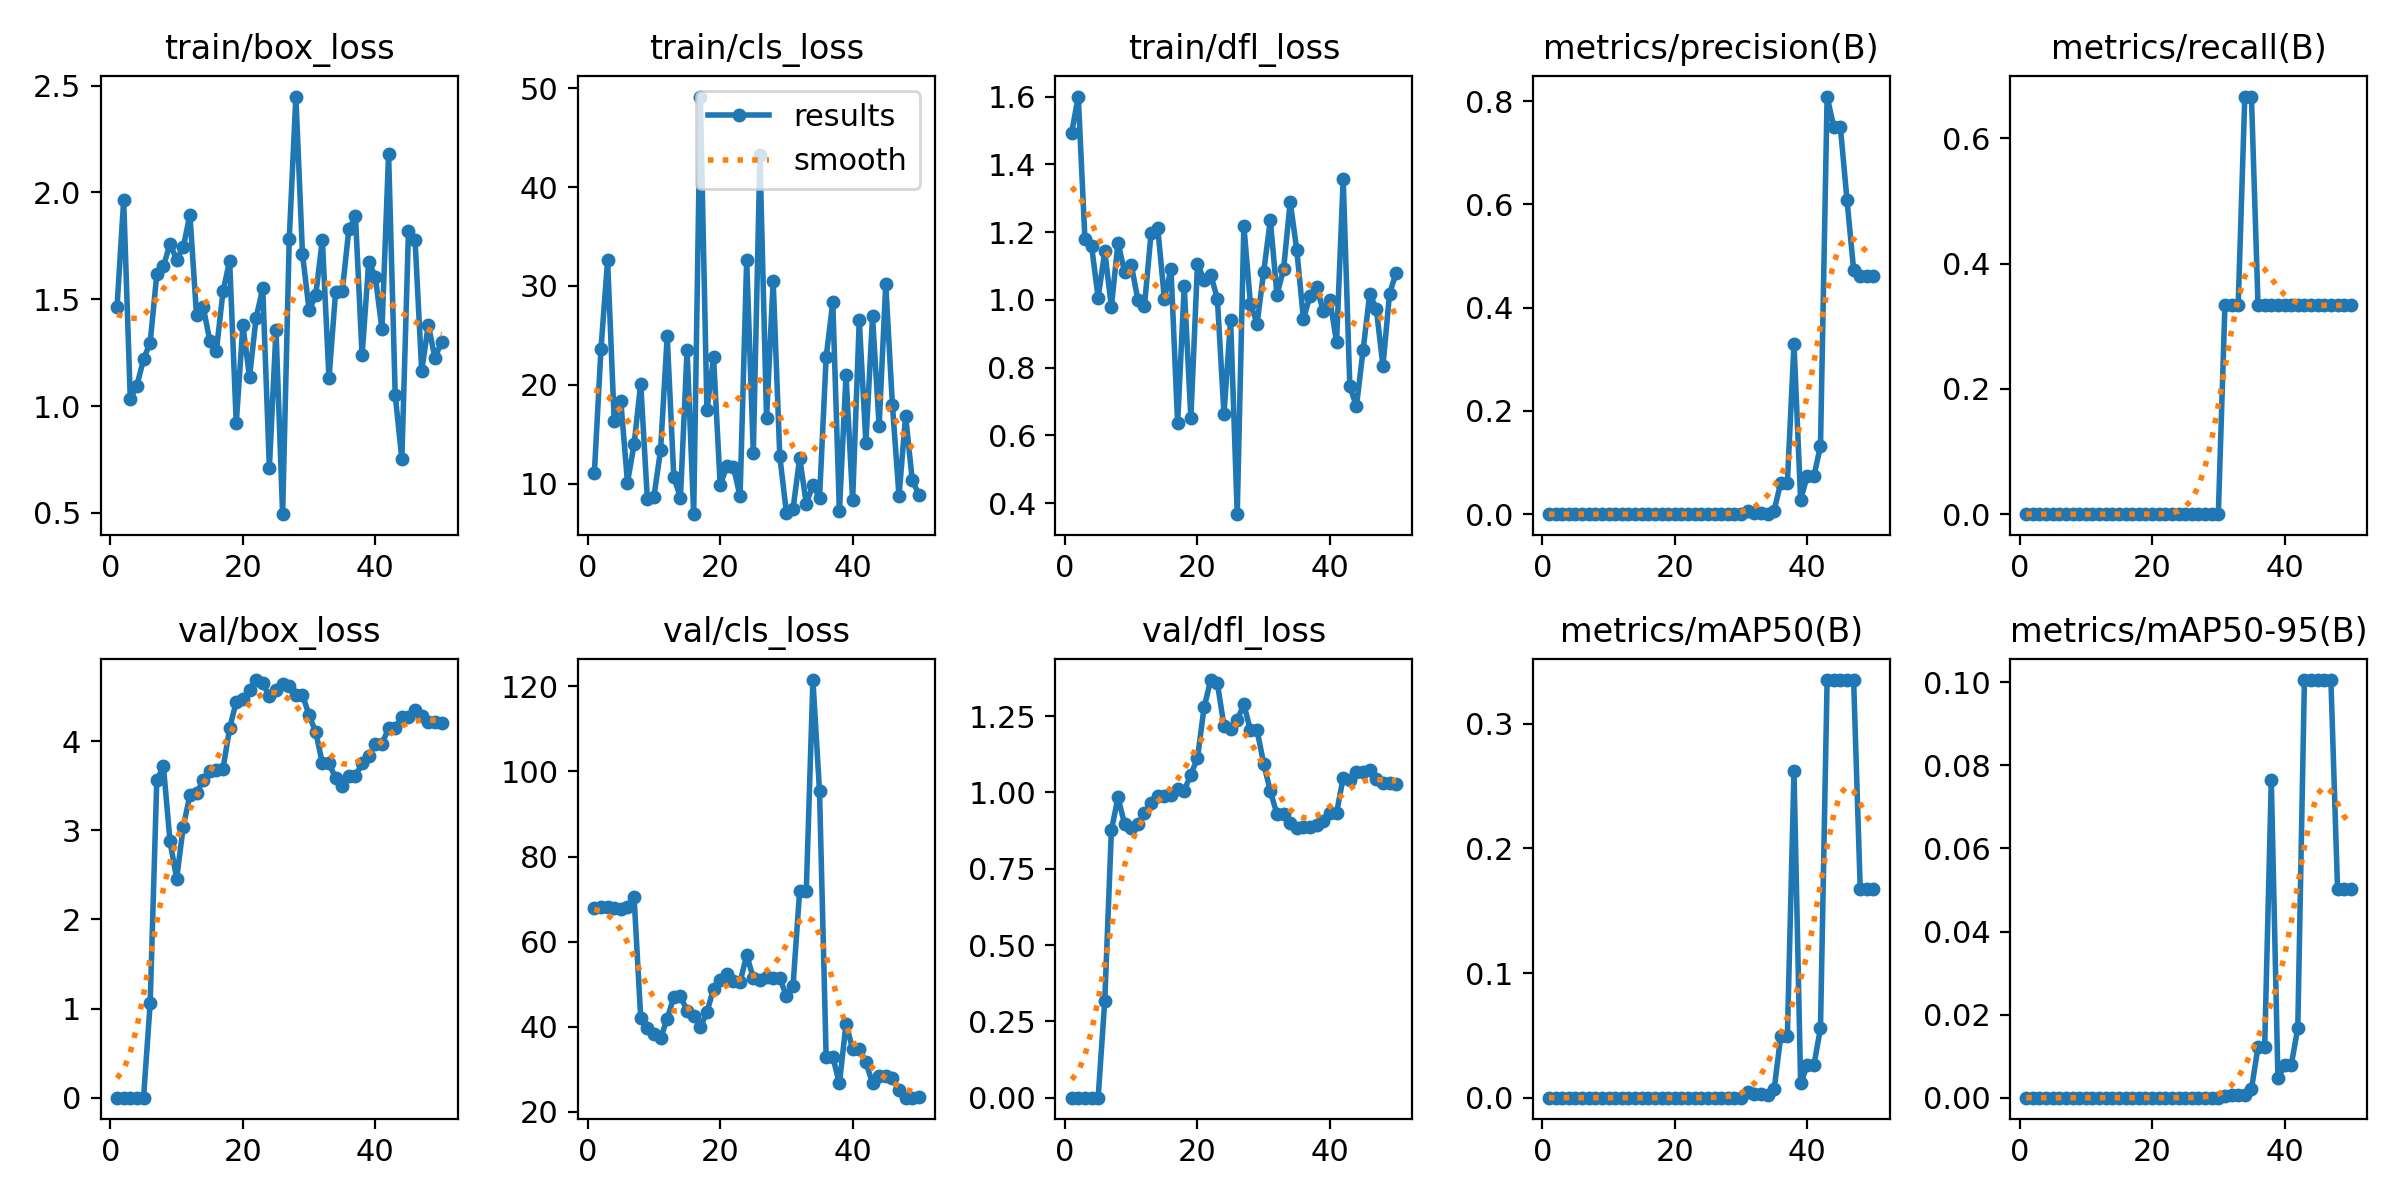

In [4]:
from IPython.display import Image
Image(filename='runs/detect/train3/results.png')

In [5]:
import cv2
from ultralytics import YOLO

model = YOLO('runs/detect/train3/weights/best.pt')
cap = cv2.VideoCapture('sample.mp4')

frame_id = 0
detections = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]  # detect
    for box in results.boxes:
        class_id = int(box.cls)
        if class_id == 0:  # name_tag
            xyxy = box.xyxy[0].tolist()
            detections.append({'frame': frame_id, 'box': xyxy})
    
    frame_id += 1

cap.release()
print("Detections:", detections)



0: 480x640 (no detections), 69.0ms
Speed: 4.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 70.0ms
Speed: 3.0ms preprocess, 70.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.0ms
Speed: 3.0ms preprocess, 73.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.0ms
Speed: 3.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 70.0ms
Speed: 2.0ms preprocess, 70.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.0ms
Speed: 3.0ms preprocess, 66.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.0ms
Speed: 3.0ms preprocess, 64.0ms i


0: 480x640 (no detections), 73.0ms
Speed: 3.0ms preprocess, 73.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 67.0ms
Speed: 3.0ms preprocess, 67.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 58.0ms
Speed: 3.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.0ms
Speed: 3.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.0ms
Speed: 4.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 70.0ms
Speed: 3.0ms preprocess, 70.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 60.3ms
Speed: 3.0ms preprocess, 60.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 68.0ms
Speed: 3.0ms preprocess, 68.0ms i


0: 480x640 (no detections), 71.0ms
Speed: 2.0ms preprocess, 71.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.0ms
Speed: 3.0ms preprocess, 73.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.2ms
Speed: 3.0ms preprocess, 84.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 76.0ms
Speed: 3.0ms preprocess, 76.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.0ms
Speed: 3.0ms preprocess, 64.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 71.0ms
Speed: 2.0ms preprocess, 71.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.0ms
Speed: 4.0ms preprocess, 73.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 74.0ms
Speed: 4.0ms preprocess, 74.0ms i


0: 480x640 (no detections), 73.8ms
Speed: 3.1ms preprocess, 73.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.0ms
Speed: 2.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 68.9ms
Speed: 3.0ms preprocess, 68.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 65.6ms
Speed: 2.0ms preprocess, 65.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 70.9ms
Speed: 3.0ms preprocess, 70.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 74.8ms
Speed: 2.0ms preprocess, 74.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 67.8ms
Speed: 4.0ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.8ms
Speed: 2.0ms preprocess, 79.8ms i


0: 480x640 (no detections), 74.9ms
Speed: 4.0ms preprocess, 74.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 69.4ms
Speed: 3.2ms preprocess, 69.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 63.2ms
Speed: 2.3ms preprocess, 63.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 70.5ms
Speed: 2.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 76.1ms
Speed: 3.9ms preprocess, 76.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.4ms
Speed: 3.0ms preprocess, 84.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 74.9ms
Speed: 4.0ms preprocess, 74.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 71.5ms
Speed: 3.0ms preprocess, 71.5ms i


0: 480x640 (no detections), 62.5ms
Speed: 2.0ms preprocess, 62.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 61.4ms
Speed: 3.0ms preprocess, 61.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.2ms
Speed: 3.0ms preprocess, 64.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 86.0ms
Speed: 2.7ms preprocess, 86.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 74.0ms
Speed: 3.0ms preprocess, 74.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.0ms
Speed: 4.0ms preprocess, 73.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 60.0ms
Speed: 2.0ms preprocess, 60.0ms i


0: 480x640 (no detections), 65.0ms
Speed: 3.0ms preprocess, 65.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 78.0ms
Speed: 3.0ms preprocess, 78.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 102.0ms
Speed: 4.0ms preprocess, 102.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.0ms
Speed: 3.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.0ms
Speed: 2.0ms preprocess, 87.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.6ms
Speed: 3.0ms preprocess, 96.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 95.0ms
Speed: 3.0ms preprocess, 95.0ms


0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.2ms
Speed: 3.0ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 78.0ms
Speed: 3.0ms preprocess, 78.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.0ms
Speed: 3.0ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.0ms
Speed: 4.0ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.0ms
Speed: 3.0ms preprocess, 84.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 76.0ms
Speed: 4.0ms preprocess, 76.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.0ms
Speed: 3.0ms preprocess, 83.0ms i


0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 75.0ms
Speed: 3.0ms preprocess, 75.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 73.3ms
Speed: 2.7ms preprocess, 73.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.0ms
Speed: 3.0ms preprocess, 84.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 95.0ms
Speed: 3.0ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 105.0ms
Speed: 4.0ms preprocess, 105.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 178.0ms
Speed: 3.0ms preprocess, 178.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 102.0ms
Speed: 4.0ms preprocess, 102


0: 480x640 (no detections), 103.8ms
Speed: 3.0ms preprocess, 103.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 116.3ms
Speed: 4.0ms preprocess, 116.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.2ms
Speed: 3.0ms preprocess, 97.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 117.2ms
Speed: 4.0ms preprocess, 117.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.5ms
Speed: 4.0ms preprocess, 92.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.1ms
Speed: 3.0ms preprocess, 85.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 104.6ms
Speed: 3.0ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.3ms
Speed: 3.7ms preprocess,


0: 480x640 (no detections), 73.0ms
Speed: 3.0ms preprocess, 73.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 71.0ms
Speed: 3.0ms preprocess, 71.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.0ms
Speed: 3.0ms preprocess, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.0ms
Speed: 3.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 74.0ms
Speed: 4.0ms preprocess, 74.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.0ms
Speed: 2.0ms preprocess, 64.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 63.0ms
Speed: 2.0ms preprocess, 63.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.0ms
Speed: 3.0ms preprocess, 66.0ms i


0: 480x640 (no detections), 102.0ms
Speed: 3.0ms preprocess, 102.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.0ms
Speed: 3.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 98.0ms
Speed: 3.0ms preprocess, 98.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.0ms
Speed: 4.0ms preprocess, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.4ms
Speed: 4.0ms preprocess, 83.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.8ms
Speed: 4.0ms preprocess, 79.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 72.1ms
Speed: 3.0ms preprocess, 72.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 66.5ms
Speed: 2.0ms preprocess, 66.5ms


0: 480x640 (no detections), 81.0ms
Speed: 3.0ms preprocess, 81.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.0ms
Speed: 3.0ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.3ms
Speed: 1.6ms preprocess, 93.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.8ms
Speed: 4.0ms preprocess, 80.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.2ms
Speed: 3.0ms preprocess, 85.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 81.1ms
Speed: 3.3ms preprocess, 81.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.6ms
Speed: 4.9ms preprocess, 85.6ms i


0: 480x640 (no detections), 68.3ms
Speed: 3.2ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.8ms
Speed: 3.4ms preprocess, 77.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.3ms
Speed: 3.2ms preprocess, 79.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.9ms
Speed: 3.0ms preprocess, 80.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 91.9ms
Speed: 3.1ms preprocess, 91.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 81.4ms
Speed: 3.8ms preprocess, 81.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.8ms
Speed: 3.6ms preprocess, 83.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 87.0ms
Speed: 4.3ms preprocess, 87.0ms inference, 1.0ms

Speed: 4.0ms preprocess, 68.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 69.0ms
Speed: 3.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 68.0ms
Speed: 3.0ms preprocess, 68.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.1ms
Speed: 3.0ms preprocess, 89.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 4.0ms preprocess, 77.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.0ms
Speed: 3.0ms preprocess, 80.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.0ms
Speed: 3.0ms preprocess, 80.0ms inference, 1.0ms postprocess per imag


0: 480x640 (no detections), 105.3ms
Speed: 4.0ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.9ms
Speed: 3.3ms preprocess, 93.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 95.4ms
Speed: 3.0ms preprocess, 95.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 99.7ms
Speed: 4.0ms preprocess, 99.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.4ms
Speed: 4.1ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.7ms
Speed: 3.0ms preprocess, 77.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 74.0ms
Speed: 3.0ms preprocess, 74.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 146.7ms
Speed: 4.0ms preprocess, 146.7ms inferen

Speed: 3.0ms preprocess, 93.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 102.0ms
Speed: 4.0ms preprocess, 102.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 101.0ms
Speed: 3.0ms preprocess, 101.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.0ms
Speed: 3.0ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 96.0ms
Speed: 3.0ms preprocess, 96.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 105.3ms
Speed: 4.0ms preprocess, 105.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.0ms
Speed: 4.0ms preprocess, 80.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 86.0ms
Speed: 3.0ms preprocess, 86.0ms inference, 1.0ms postprocess pe

Speed: 2.0ms preprocess, 94.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 82.2ms
Speed: 3.0ms preprocess, 82.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.5ms
Speed: 4.0ms preprocess, 87.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 82.1ms
Speed: 3.2ms preprocess, 82.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 94.3ms
Speed: 4.0ms preprocess, 94.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 89.3ms
Speed: 3.0ms preprocess, 89.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 name_tag, 77.6ms
Speed: 4.0ms preprocess, 77.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 name_tags, 82.5ms
Speed: 3.1ms preprocess, 82.5ms inference, 1.0ms postprocess per image at shape (1, 3, 4


0: 480x640 2 name_tags, 88.0ms
Speed: 3.0ms preprocess, 88.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 87.1ms
Speed: 4.0ms preprocess, 87.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 95.0ms
Speed: 4.0ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 92.4ms
Speed: 3.0ms preprocess, 92.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 81.0ms
Speed: 3.0ms preprocess, 81.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 90.0ms
Speed: 2.0ms preprocess, 90.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.0ms
Speed: 4.0ms preprocess, 94.0ms infer

Speed: 3.0ms preprocess, 91.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 82.0ms
Speed: 3.0ms preprocess, 82.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 76.0ms
Speed: 4.0ms preprocess, 76.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 4.0ms preprocess, 77.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 88.0ms
Speed: 3.0ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 86.7ms
Speed: 4.0ms preprocess, 86.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 86.0ms
Speed: 4.0ms preprocess, 86.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 76.0ms
Speed: 3.0ms preprocess, 76.0ms inference, 0.0ms postprocess per imag

Speed: 3.0ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.0ms
Speed: 3.0ms preprocess, 83.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 83.0ms
Speed: 3.0ms preprocess, 83.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.0ms
Speed: 3.0ms preprocess, 80.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 78.0ms
Speed: 2.0ms preprocess, 78.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.0ms
Speed: 3.0ms preprocess, 84.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.3ms
Speed: 3.0ms preprocess, 97.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.0ms
Speed: 5.0ms preprocess, 100.0ms inference, 1.0ms postprocess per im


0: 480x640 (no detections), 68.3ms
Speed: 2.0ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 77.0ms
Speed: 3.0ms preprocess, 77.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 80.0ms
Speed: 4.0ms preprocess, 80.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 127.0ms
Speed: 4.0ms preprocess, 127.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 94.0ms
Speed: 3.0ms preprocess, 94.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 89.8ms
Speed: 4.0ms preprocess, 89.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 88.0ms
Speed: 3.0ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 91.0ms
Speed: 3.0ms preprocess, 91.0ms

In [6]:
print(f"Total frames processed: {frame_id}")
print(f"Total detections found: {len(detections)}")

frames_with_detections = set(d['frame'] for d in detections)
print(f"Frames with detections: {len(frames_with_detections)}")

if len(frames_with_detections) > 0:
    avg_detections_per_frame = len(detections) / len(frames_with_detections)
else:
    avg_detections_per_frame = 0
print(f"Average detections per frame (only frames with detections): {avg_detections_per_frame:.2f}")


Total frames processed: 1341
Total detections found: 92
Frames with detections: 86
Average detections per frame (only frames with detections): 1.07


In [7]:
# Group detections by frame
from collections import defaultdict

frame_detections = defaultdict(list)
for det in detections:
    frame_detections[det['frame']].append(det['box'])

# Print summary
for frame_id in sorted(frame_detections.keys()):
    print(f"Frame {frame_id} detections:")
    for i, box in enumerate(frame_detections[frame_id], 1):
        print(f"  Box {i}: {box}")


Frame 810 detections:
  Box 1: [492.176513671875, 680.7545166015625, 511.053955078125, 695.5169677734375]
Frame 811 detections:
  Box 1: [497.32745361328125, 670.090087890625, 515.2985229492188, 684.4047241210938]
Frame 813 detections:
  Box 1: [497.06744384765625, 636.0311889648438, 516.0701293945312, 650.6484375]
Frame 814 detections:
  Box 1: [498.281982421875, 619.3327026367188, 514.968017578125, 631.2536010742188]
Frame 815 detections:
  Box 1: [502.7347412109375, 599.9537353515625, 522.2047729492188, 615.1732788085938]
Frame 816 detections:
  Box 1: [512.831298828125, 572.121337890625, 534.2612915039062, 589.91845703125]
  Box 2: [516.480712890625, 573.3973388671875, 539.6712036132812, 588.002197265625]
Frame 817 detections:
  Box 1: [525.6036987304688, 554.9998779296875, 545.9987182617188, 568.2874145507812]
Frame 818 detections:
  Box 1: [536.0667114257812, 524.8460083007812, 557.1273193359375, 541.2965698242188]
Frame 819 detections:
  Box 1: [541.7673950195312, 500.6770019531

In [8]:
import cv2

input_video = 'sample.mp4'
output_video = 'output_with_detections.mp4'

cap = cv2.VideoCapture(input_video)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

frame_id = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Draw detections on this frame if any
    if frame_id in frame_detections:
        for box in frame_detections[frame_id]:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    out.write(frame)
    frame_id += 1

cap.release()
out.release()
print(f"Video saved as {output_video}")


Video saved as output_with_detections.mp4
